In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Water Quality Testing.csv')
data.head()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,1,7.25,23.1,4.5,7.8,342
1,2,7.11,22.3,5.1,6.2,335
2,3,7.03,21.5,3.9,8.3,356
3,4,7.38,22.9,3.2,9.5,327
4,5,7.45,20.7,3.8,8.1,352


### Check for Null values

Axes(0.125,0.11;0.62x0.77)


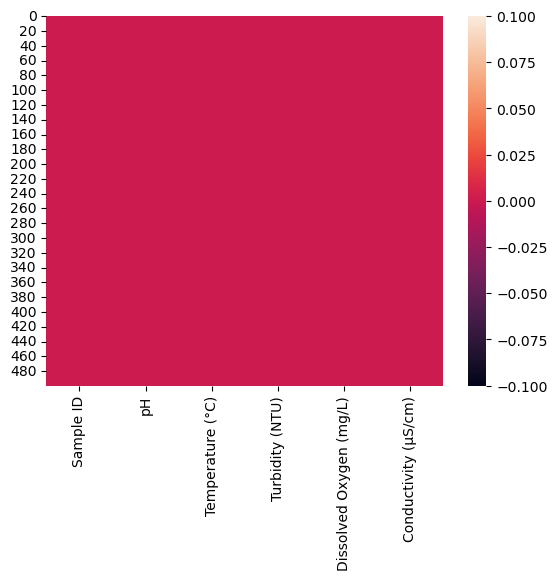

In [3]:
print(sns.heatmap(data.isnull()))

In [4]:
data.isnull().sum()

Sample ID                  0
pH                         0
Temperature (°C)           0
Turbidity (NTU)            0
Dissolved Oxygen (mg/L)    0
Conductivity (µS/cm)       0
dtype: int64

From the image we can concluse the data frame contains no null value

In [5]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

Text(0.5, 1.0, 'PH level distribution in the water samples')

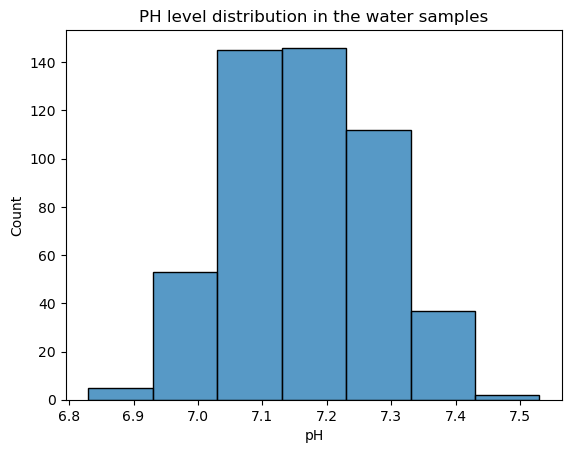

In [6]:
sns.histplot(data=data,x="pH",binwidth=0.1)
plt.title("PH level distribution in the water samples")

Most of the water sample's pH level falls under 7.0 to 7.4

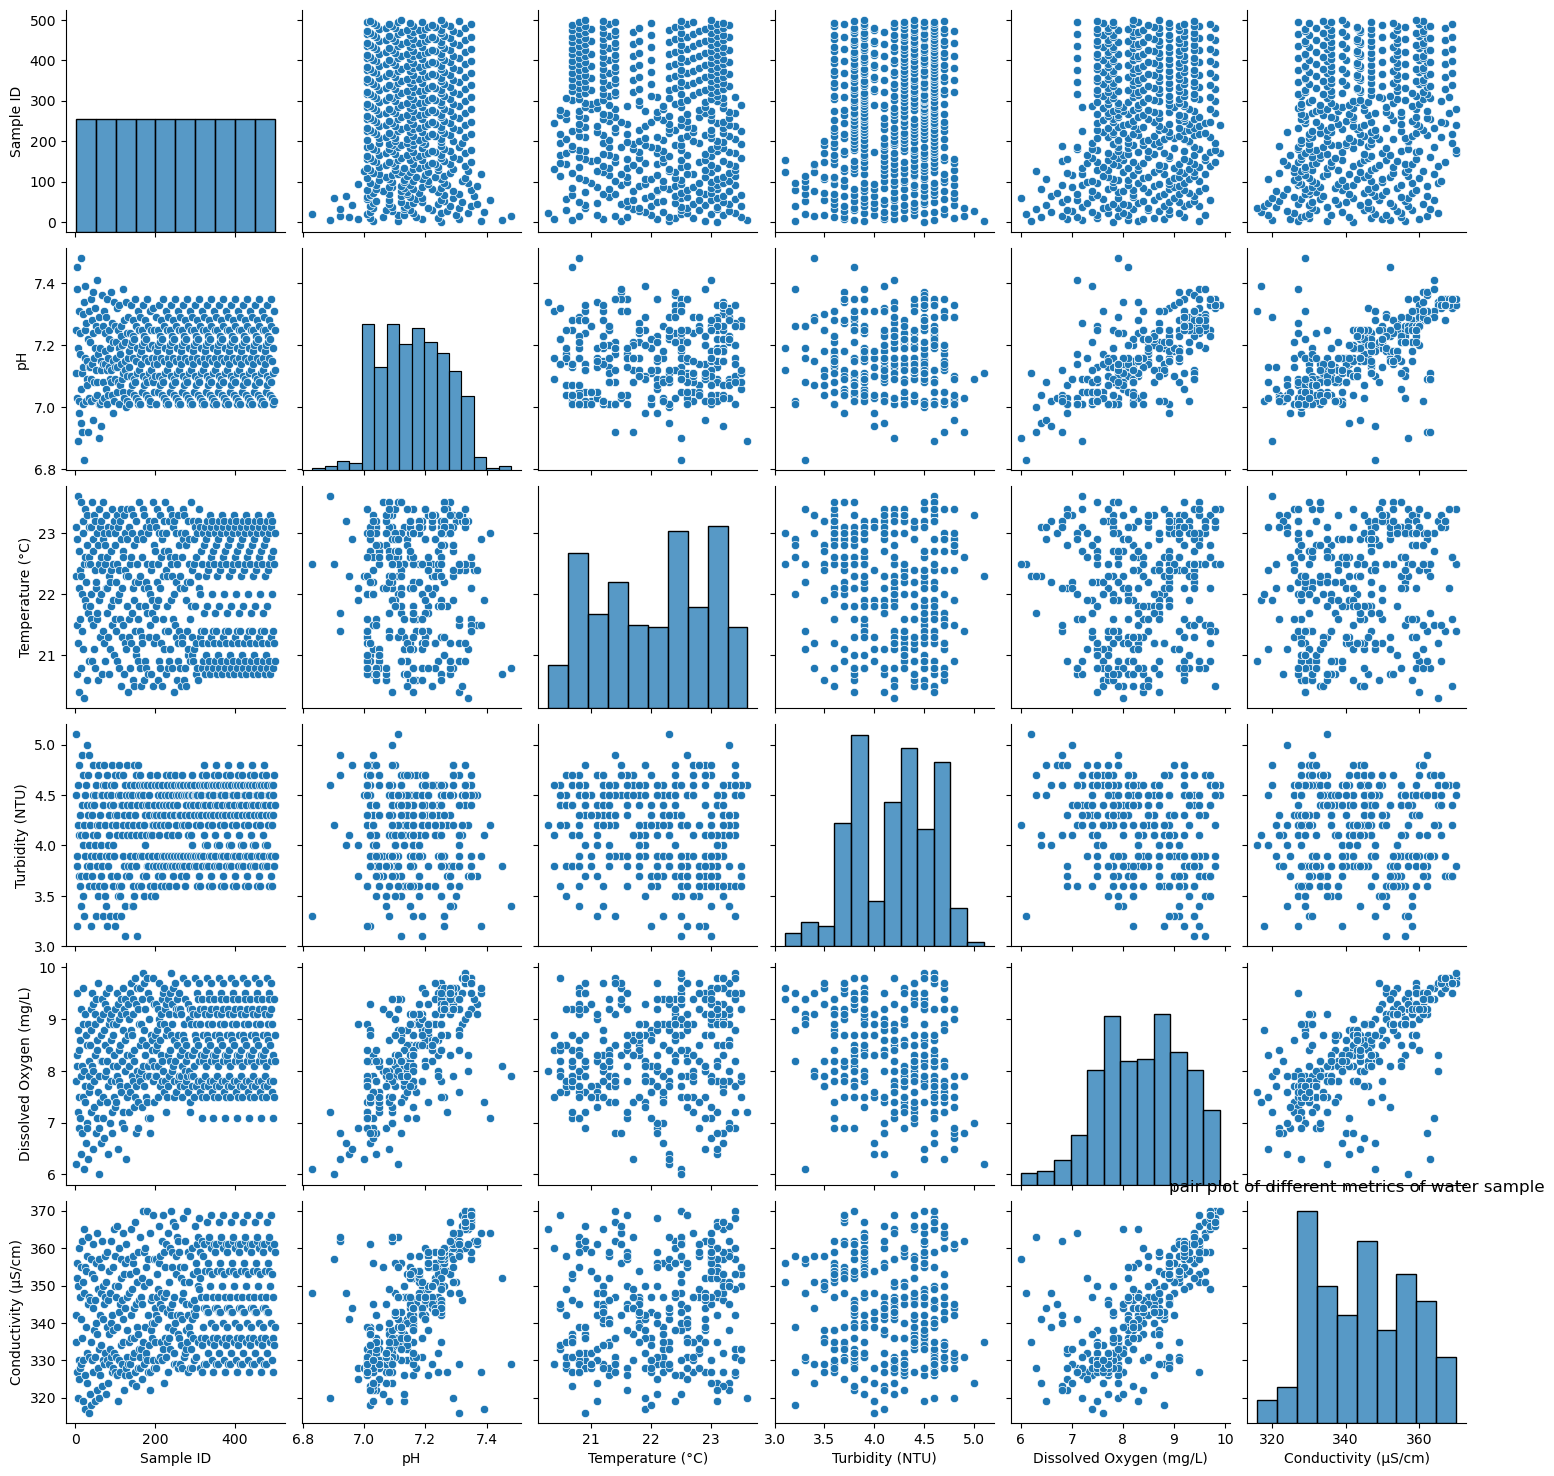

In [7]:
sns.pairplot(data)
plt.title("pair plot of different metrics of water sample")
plt.show()

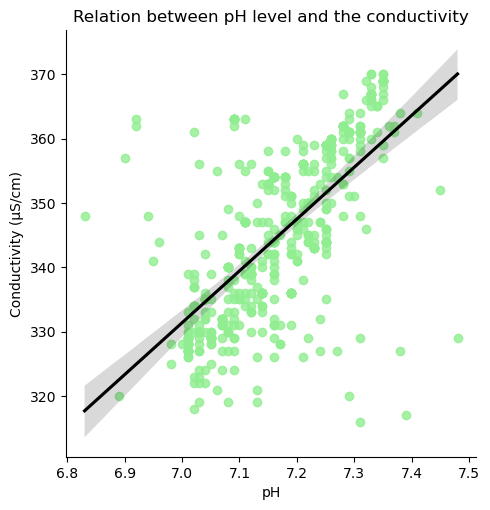

In [8]:
sns.lmplot(data=data,x="pH",y="Conductivity (µS/cm)",scatter_kws={'color':'lightgreen'},line_kws={'color':'black'})
plt.title("Relation between pH level and the conductivity")
plt.show()

From the graph we can indentify the increase in pH level cuases the increase in Conductivity

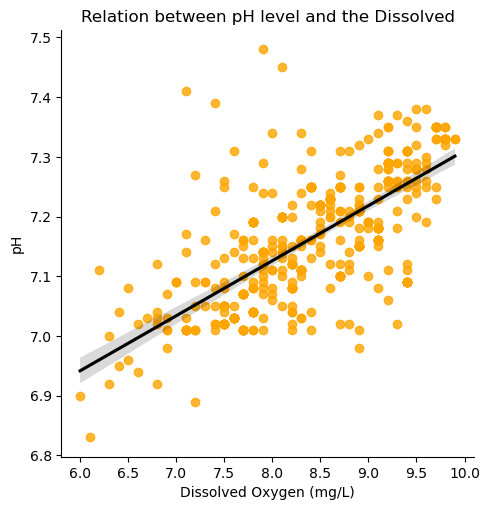

In [9]:
sns.lmplot(data=data,x="Dissolved Oxygen (mg/L)",y="pH",scatter_kws={'color':'orange'},line_kws={'color':'black'})
plt.title("Relation between pH level and the Dissolved")
plt.show()

More Oxygent in water increase the pH level of the water

### Using the Kmeans Model to classify the water sample into 3 category

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
StandardScaler(copy=True,with_mean=True,with_std=True)
sampled_scaler = scaler.transform(data)

In [11]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=2023)
cluster = model.fit_predict(sampled_scaler)

In [12]:
level = pd.Series(cluster)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


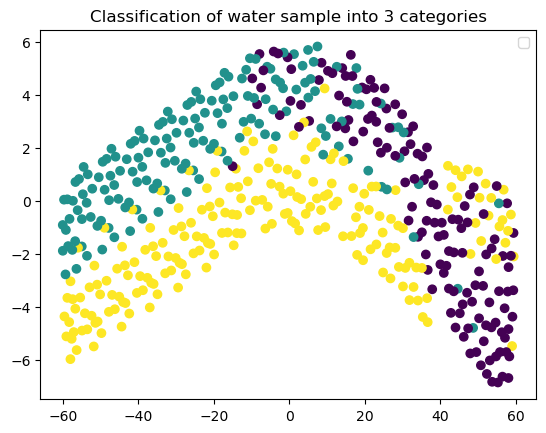

In [13]:
from sklearn.manifold import TSNE

model = TSNE()

transformed_model = model.fit_transform(data)

xs = transformed_model[:,0]
ys =transformed_model[:,1]

plt.scatter(xs,ys,c=level)
plt.title("Classification of water sample into 3 categories")
plt.legend()
plt.show()

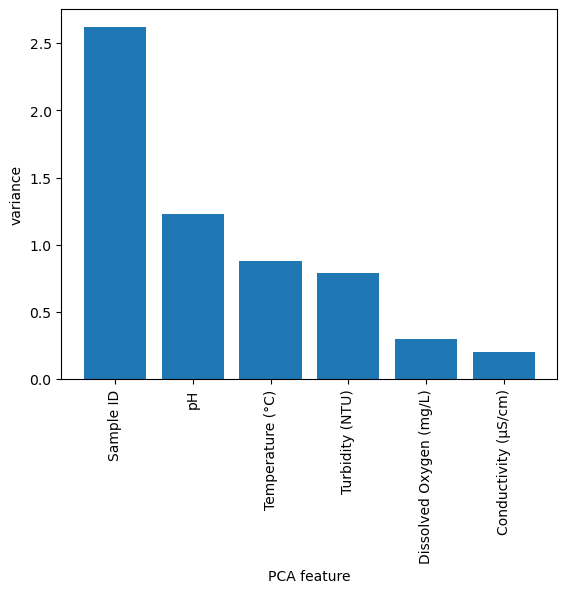

In [14]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(data)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features,data.columns)
plt.xticks(rotation=90)
plt.show()

In [15]:
data['classification'] = cluster
data.head()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm),classification
0,1,7.25,23.1,4.5,7.8,342,0
1,2,7.11,22.3,5.1,6.2,335,0
2,3,7.03,21.5,3.9,8.3,356,0
3,4,7.38,22.9,3.2,9.5,327,2
4,5,7.45,20.7,3.8,8.1,352,2


Lets rename the sample categories based on the results

In [16]:
data['classification'] = data['classification'].fillna(0)
data['classification'] = data['classification'].astype("int")
data['classification'] = data['classification'].map({0:'category1',1:'category2',2:'category3'})
data['classification'].value_counts()

category3    206
category2    158
category1    136
Name: classification, dtype: int64

### check the distribution of category in the samples

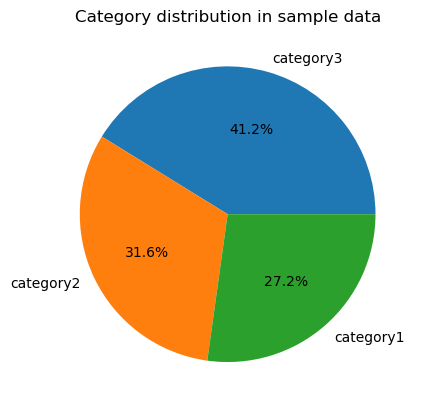

In [17]:
category = data['classification'].value_counts().reset_index(name='counts')
plt.pie(x=category['counts'],labels=category['index'],autopct='%1.1f%%')
plt.title("Category distribution in sample data")
plt.show()

<Figure size 1500x800 with 0 Axes>

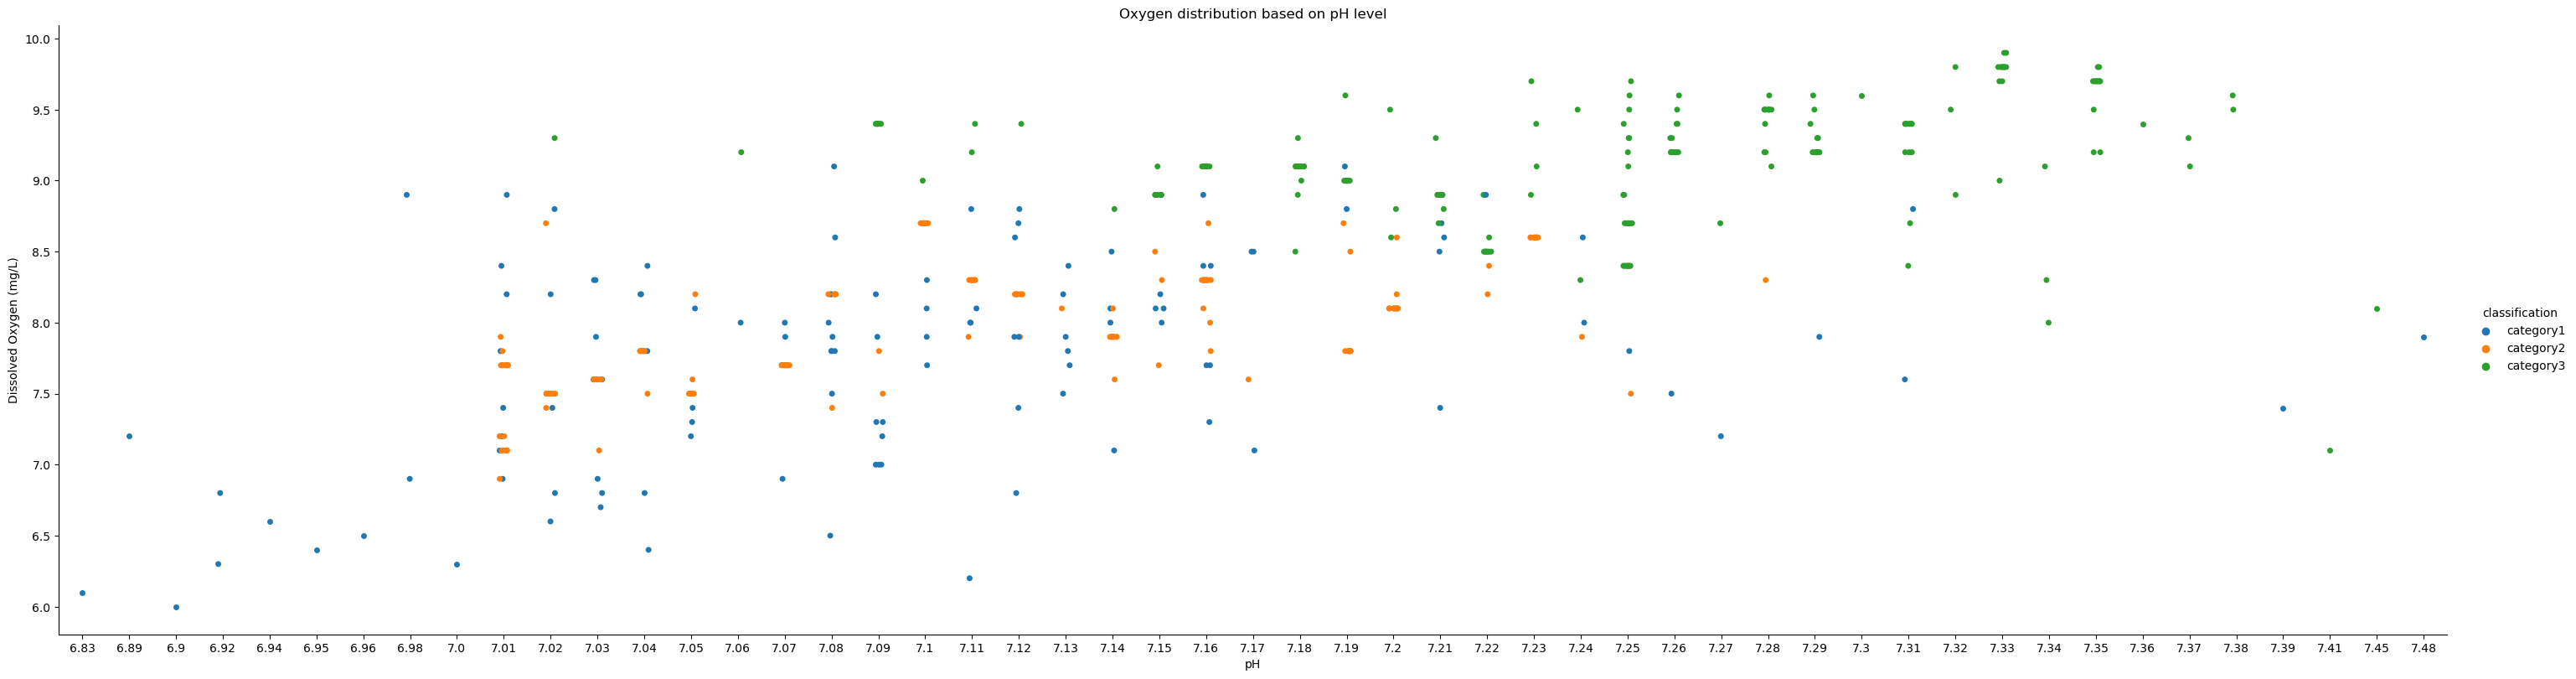

In [18]:
fig = plt.figure(figsize=(15,8))
sns.catplot(data=data,x="pH",y="Dissolved Oxygen (mg/L)",hue="classification",height=8,aspect=3.7)
plt.title("Oxygen distribution based on pH level")
plt.show()

<Figure size 1500x800 with 0 Axes>

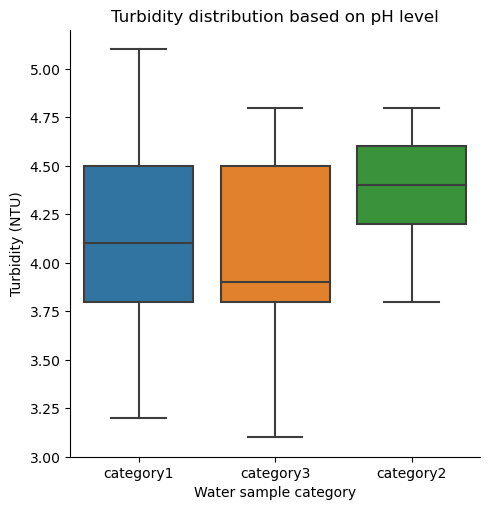

In [19]:
fig = plt.figure(figsize=(15,8))
sns.catplot(data=data,y="Turbidity (NTU)",x="classification",kind='box')
plt.title("Turbidity distribution based on pH level")
plt.xlabel("Water sample category")
plt.show()

### Distribution of 2 important features while diciding the sample classification

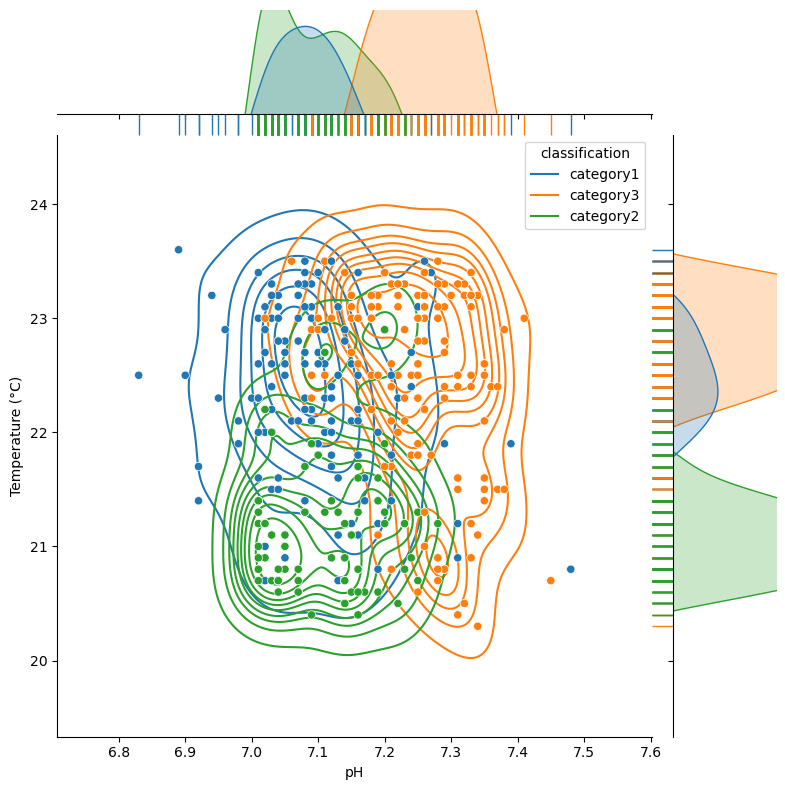

In [20]:
g = sns.jointplot(data=data,x="pH",y="Temperature (°C)",hue="classification",height=8)
g.plot_joint(sns.kdeplot,color='y',zorder=0)
g.plot_marginals(sns.rugplot,color='r',height=-0.2,clip_on=False)
plt.show()

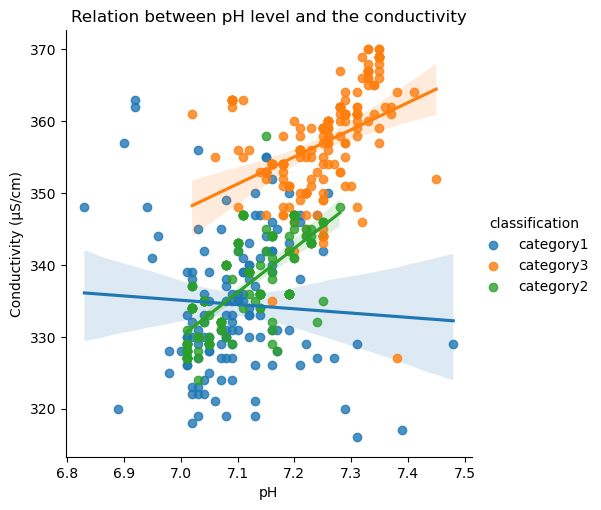

In [21]:
sns.lmplot(data=data,x="pH",y="Conductivity (µS/cm)",hue='classification')
plt.title("Relation between pH level and the conductivity")
plt.show()

For the Categorey 1 water sample the Conductivity level satyed constant. We can see a suddent increase in conductivity for the category 2 water samples when the pH level is increaseing

In [22]:
data.groupby("classification")['Dissolved Oxygen (mg/L)'].mean()

classification
category1    7.750735
category2    7.941139
category3    9.137379
Name: Dissolved Oxygen (mg/L), dtype: float64

Category 3 samples have more mean Dissolved Oxygen (mg/L) comapred to other water samples

In [23]:
data.head()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm),classification
0,1,7.25,23.1,4.5,7.8,342,category1
1,2,7.11,22.3,5.1,6.2,335,category1
2,3,7.03,21.5,3.9,8.3,356,category1
3,4,7.38,22.9,3.2,9.5,327,category3
4,5,7.45,20.7,3.8,8.1,352,category3


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop(columns=['classification'])
y = data['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Perform cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv)
accuracy = accuracy_score(y_test, y_pred)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())
print("Accuracy:", accuracy)

Cross-Validation Scores: [0.91 0.86 0.85 0.88 0.83]
Mean Score: 0.866
Accuracy: 0.91


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = data.drop(columns=['classification'])
y = data['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Perform cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv)
accuracy = accuracy_score(y_test, y_pred)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())
print("Accuracy:", accuracy)

Cross-Validation Scores: [0.98 0.92 0.96 0.93 0.97]
Mean Score: 0.952
Accuracy: 0.98
